# src: Perceptual Importance of the Phase Related Information in Speech

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [2]:
def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

In [3]:
resamplingrate = 16000#44100
hop_length = 512

y, sr = librosa.load("ie_1.wav", sr=resamplingrate)

In [4]:
stft = librosa.stft(y, hop_length=hop_length)

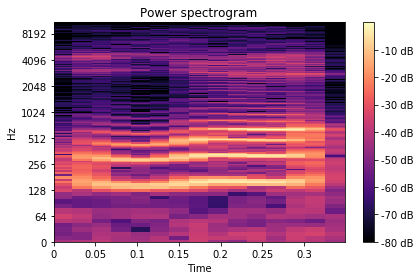

In [5]:
from librosa import display
display.specshow(librosa.amplitude_to_db(np.abs(stft), ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [6]:
magnitude, phase = librosa.magphase(stft)

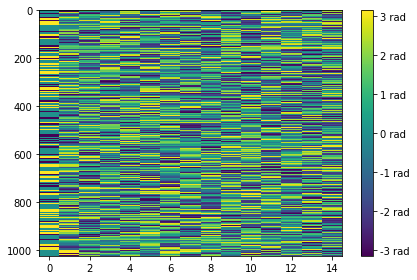

In [7]:
plt.imshow(np.angle(phase),aspect='auto')
plt.colorbar(format='%1.0f rad')
plt.tight_layout()

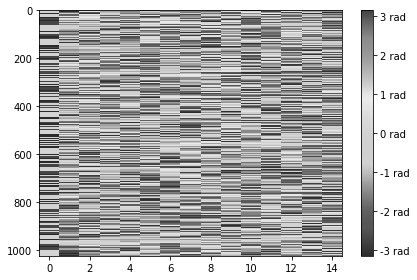

In [8]:
plt.imshow(np.angle(phase), cmap=grayify_cmap('jet'),aspect='auto')
plt.colorbar(format='%1.0f rad')
plt.tight_layout()

In [9]:
import numba

@numba.jit
def calc_rps(y, fft_freq=8000, start=0., stop=10., num=1000, f_0=1):
    rps = np.empty((fft_freq // f_0, num))

    time = np.linspace(start, stop, num=num)
    theata = np.angle(np.fft.fft(y, n=fft_freq))   
    theata_1 = theata[f_0 - 1]  
    # for k, theata_k in enumerate(theata, start=1):               
    for k, fft_idx in enumerate(range(0, fft_freq, f_0)):
        for i, t in enumerate(time):
            rps[k-1][i] = ((2 * np.pi * k * f_0 * t + theata[fft_idx]) - k * (2 * np.pi * k * f_0 * t + theata_1)) % np.pi
            
    return rps

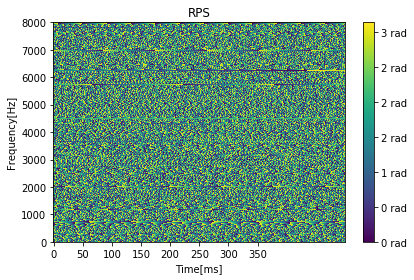

In [17]:
plt.imshow(calc_rps(y, stop=0.4, num=500),aspect='auto')
plt.title('RPS')
plt.xlabel('Time[ms]')
plt.ylabel('Frequency[Hz]')
plt.xticks(list(range(0, 400, 50)))
plt.gca().invert_yaxis()
plt.colorbar(format='%1.0f rad')
plt.tight_layout()

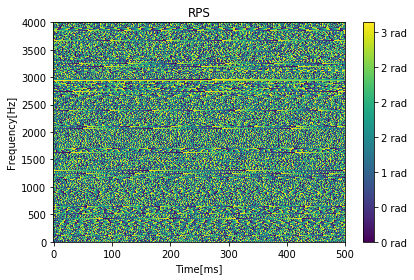

In [18]:
plt.imshow(calc_rps(y, stop=0.4, num=500, f_0=2),aspect='auto')
plt.gca().invert_yaxis()
plt.title('RPS')
plt.xlabel('Time[ms]')
plt.ylabel('Frequency[Hz]')
plt.colorbar(format='%1.0f rad')
plt.tight_layout()

In [ ]:
[13.,  2.,  4.,  0.,  3.,  4.,  5.,  8., 11.,  7.,  4.,  7.,  2.,
        0.,  3.,  4.,  3.,  4.,  4.,  2.,  6.,  5.,  1.,  0.,  1.,  3.,
        0.,  3.,  0.,  2.,  3.,  6.,  1.,  1.,  6.,  0.]